In [1]:
import sys
sys.path.append('/home/investigator/mariandbt/python/notebooks/modules')
sys.path.append('/scratch/marian/python/notebooks/modules')

from import_modules import *
import cigar as cig

from scipy.optimize import curve_fit

##  Data reading

In [ ]:
directory   = '/data/marian/cigar/ProcessedWaveforms/'

pressure    = 7.5 # bar
temperature = 9 # deg

In [3]:
if (pressure == 8.5) & (temperature == 2):
    run_noKr    = '20250606_no_source_8.5bar_ArXe_2deg/'
    file_noKr   = '20250606_ArXe_8.5bar_no_source_2deg_Autotrg_output_1.csv'
elif (pressure == 7.5) & (temperature == 9):
    run_noKr    = '20250612_no_source_7.5bar_ArXe_9deg/'
    file_noKr   = '20250612_ArXe_7.5bar_no_source_9deg_Autotrg_output_1.csv'
elif (pressure == 6.5) & (temperature == 4):
    run_noKr    = '20250611_no_source_6.5bar_ArXe_4deg/'
    file_noKr   = '20250611_ArXe_6.5bar_no_source_4deg_Autotrg_output_1.csv'

In [4]:
df_noKr = pd.read_csv(directory + run_noKr + file_noKr)
df_noKr = df_noKr.drop("Unnamed: 0",axis=1)



##  Data Analysis: Charge to pes

In [5]:
n_waveforms     = len(df_noKr.event.unique())
time_window     = (df_noKr.time.max() - df_noKr.time.min())*n_waveforms # time_window_per_waveform*n_waveforms_in_total
total_charge    = df_noKr.groupby('channel').sum().integral


In [6]:
df_noKr.event.unique()

array([      0,     191,     396, ..., 5142813, 5143015, 5149725])

In [7]:
time_window/n_waveforms

7.9976e-05

In [8]:
DCR = {}

for ch in [1, 2, 3, 4]:
    
    charge_in_pes = cig.ChargeToPes(total_charge[f'CH{ch}'], ch, temp = temperature)

    DCR[f'CH{ch}'] = charge_in_pes/time_window

In [9]:
print(f"""
      DCR at {temperature}deg calculated at {pressure}bars:

      CH1: {DCR['CH1']:.2E}   phes/s
      CH2: {DCR['CH2']:.2E}   phes/s
      CH3: {DCR['CH3']:.2E}   phes/s
      CH4: {DCR['CH4']:.2E}   phes/s

    """)


      DCR at 9deg calculated at 7.5bars:

      CH1: 1.14E+06   phes/s
      CH2: 1.12E+06   phes/s
      CH3: 9.23E+05   phes/s
      CH4: 1.19E+06   phes/s

    


In [10]:
print(f"""
      Copy this in Samuele's code for {temperature}deg at {pressure}bars:

      CH1: {DCR['CH1']:.2E}*window_size 
      ,CH2: {DCR['CH2']:.2E}*window_size 
      ,CH3: {DCR['CH3']:.2E}*window_size 
      ,CH4: {DCR['CH4']:.2E}*window_size 

    """)


      Copy this in Samuele's code for 9deg at 7.5bars:

      CH1: 1.14E+06*window_size 
      ,CH2: 1.12E+06*window_size 
      ,CH3: 9.23E+05*window_size 
      ,CH4: 1.19E+06*window_size 

    


##  Data Analysis: DCR vs temp


In [11]:
directory   = '/data/marian/cigar/ProcessedWaveforms/'
run_noKr    = '20250818_Air_no_source_Autotrg_DCR_different_temps/'
dict_noKr  = {10:'20250818_Air_no_source_10deg_54.35V_Autotrg_DCR_output_1.csv'
               ,13:'20250818_Air_no_source_13deg_54.48V_Autotrg_DCR_output_1.csv'
               ,16:'20250818_Air_no_source_16deg_54.61V_Autotrg_DCR_output_1.csv'
               ,19:'20250818_Air_no_source_19deg_54.74V_Autotrg_DCR_output_1.csv'
               ,22:'20250818_Air_no_source_22deg_54.87V_Autotrg_DCR_output_1.csv'
               ,25:'20250818_Air_no_source_25deg_55V_Autotrg_DCR_output_1.csv'
               }
                

In [12]:
DCR_CH1_pes = {}
DCR_CH2_pes = {}
DCR_CH3_pes = {}
DCR_CH4_pes = {}

DCR_CH1_avalanches = {}
DCR_CH2_avalanches = {}
DCR_CH3_avalanches = {}
DCR_CH4_avalanches = {}

for temperature, file in dict_noKr.items():

    df_noKr = pd.read_csv(directory + run_noKr + file)
    df_noKr = df_noKr.drop("Unnamed: 0",axis=1)

    n_waveforms         = len(df_noKr.event.unique())
    time_window         = (df_noKr.time.max() - df_noKr.time.min())*n_waveforms # time_window_per_waveform*n_waveforms_in_total
    total_charge        = df_noKr.groupby('channel').sum().integral

    charge_in_pes_CH1 = cig.ChargeToPes(total_charge[f'CH{1}'], 1, temp = temperature)
    charge_in_pes_CH2 = cig.ChargeToPes(total_charge[f'CH{2}'], 2, temp = temperature)
    charge_in_pes_CH3 = cig.ChargeToPes(total_charge[f'CH{3}'], 3, temp = temperature)
    charge_in_pes_CH4 = cig.ChargeToPes(total_charge[f'CH{4}'], 4, temp = temperature)

    DCR_CH1_pes[temperature] = charge_in_pes_CH1/time_window
    DCR_CH2_pes[temperature] = charge_in_pes_CH2/time_window
    DCR_CH3_pes[temperature] = charge_in_pes_CH3/time_window
    DCR_CH4_pes[temperature] = charge_in_pes_CH4/time_window

    # avalanches > 0.5 phes
    avalanches_CH1 = (cig.ChargeToPes(df_noKr.loc[df_noKr.channel == f'CH{1}'].integral, 1, temp = temperature) > 0.5).sum()
    avalanches_CH2 = (cig.ChargeToPes(df_noKr.loc[df_noKr.channel == f'CH{2}'].integral, 2, temp = temperature) > 0.5).sum()
    avalanches_CH3 = (cig.ChargeToPes(df_noKr.loc[df_noKr.channel == f'CH{3}'].integral, 3, temp = temperature) > 0.5).sum()
    avalanches_CH4 = (cig.ChargeToPes(df_noKr.loc[df_noKr.channel == f'CH{4}'].integral, 4, temp = temperature) > 0.5).sum()

    DCR_CH1_avalanches[temperature] = avalanches_CH1/time_window
    DCR_CH2_avalanches[temperature] = avalanches_CH2/time_window
    DCR_CH3_avalanches[temperature] = avalanches_CH3/time_window
    DCR_CH4_avalanches[temperature] = avalanches_CH4/time_window
    

In [13]:
DCR_CH1_pes

{10: 923863.73652686,
 13: 1005439.2037920089,
 16: 1189438.9147299305,
 19: 1395631.3602889369,
 22: 1660548.4259198124,
 25: 1929544.9211110654}

In [14]:
DCR_CH1_avalanches

{10: 657659.7979393819,
 13: 708706.3619085726,
 16: 772900.6201860559,
 19: 871842.8028408523,
 22: 969828.4485345605,
 25: 1075847.754326298}

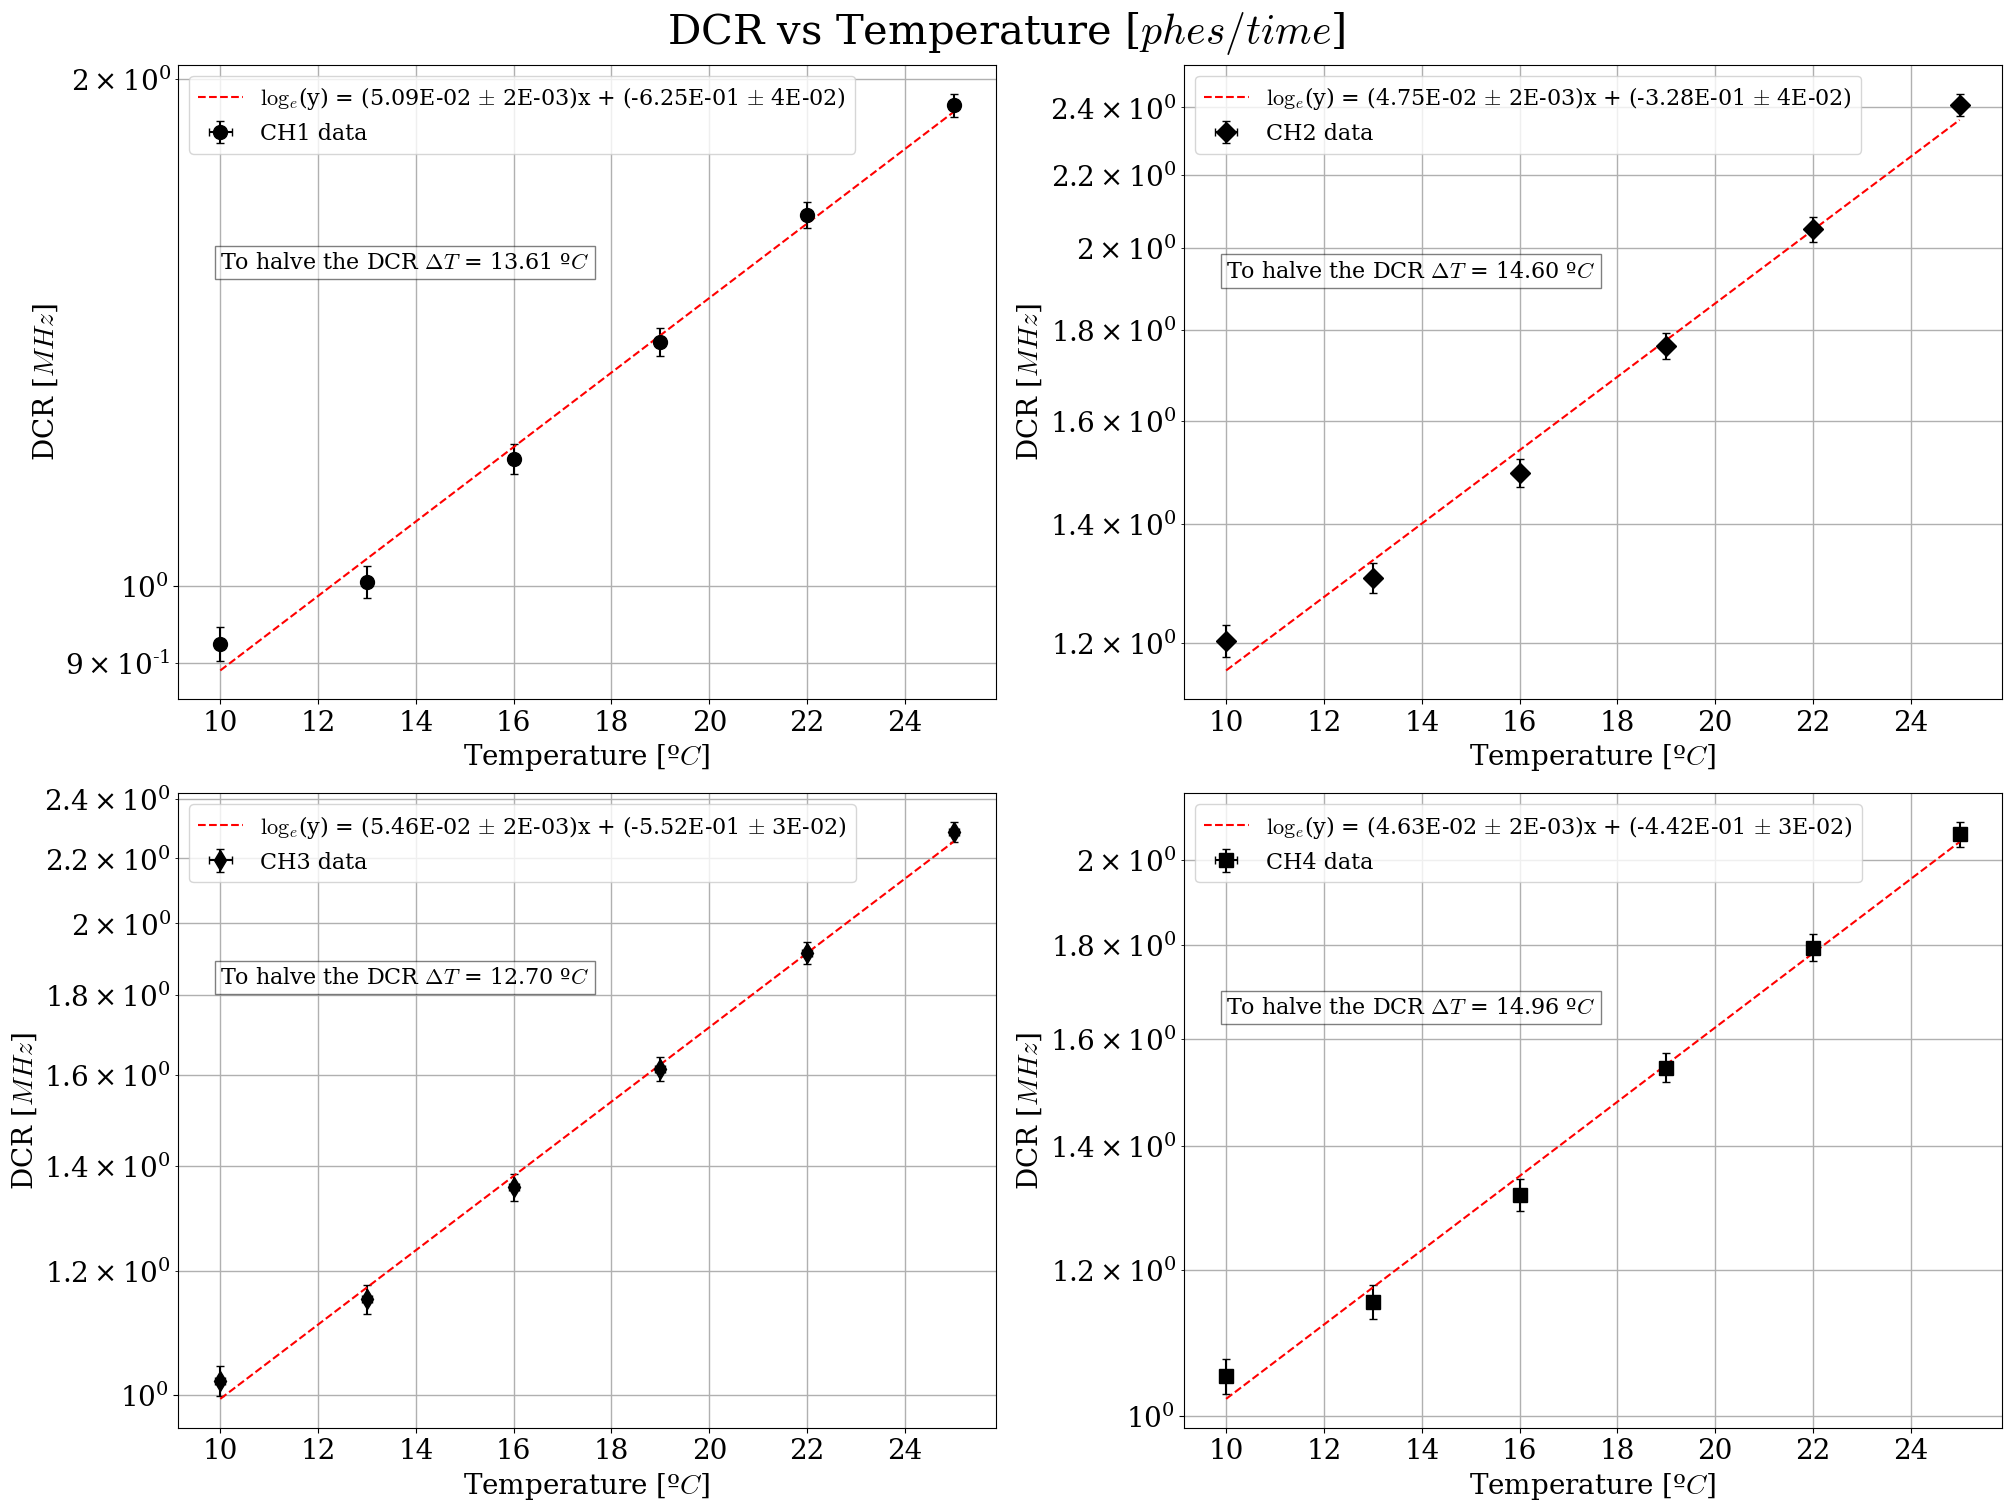

In [15]:
fig, axx = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15), constrained_layout=True)

font_size = 20
markers = ['o', 'D', 'd', 's', 'P', '^', 's']

for ii, DCR_CH in enumerate([DCR_CH1_pes, DCR_CH2_pes, DCR_CH3_pes, DCR_CH4_pes]):
# for ch in ['CH3']:
    ax = axx[int(ii/2), ii%2] 

    x = np.array(list(DCR_CH.keys()))
    y = np.array(list(DCR_CH.values()))*1e-6 # MHz
    order = np.argsort(x)
    x = x[order]
    y = y[order]
    
    # Perform linear fit and get covariance matrix
    y_fit = np.log(y)
    params, cov = np.polyfit(x, y_fit, 1, cov=True)
    slope, intercept = params

    # Get errors (standard deviations) from the covariance matrix
    slope_err = np.sqrt(cov[0, 0])
    intercept_err = np.sqrt(cov[1, 1])

    ax.errorbar(x, y
                ,xerr=0.1
                ,yerr=np.sqrt(y/n_waveforms)
                ,fmt=f'{markers[ii]}k' 
                ,label = fr'CH{ii+1} data' 
                ,capsize=3
                ,markersize = 10)
    
    ax.plot(x, np.exp(slope*x + intercept)
            ,'--r', alpha = 1
            ,label = fr'$\log_e$(y) = ({slope:.2E} $\pm$ {slope_err:.0E})x + ({intercept:.2E} $\pm$ {intercept_err:.0E})')
    
    ax.text(x.min(), y.max()*0.8, fr'To halve the DCR $\Delta T$ = {np.log(2)/slope:.2f} º$C$'
            ,bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
            ,fontsize = font_size*0.8); 

    ax.set_xlabel(r'Temperature [º$C$]', fontsize = font_size);
    ax.set_ylabel(r'DCR [$MHz$]', fontsize = font_size);
    ax.set_yscale('log')
    
    # Optionally also show minor, but lighter
    ax.grid(True, which="both", linestyle="-", linewidth=1)

    ax.legend(fontsize = font_size*0.8)

fig.suptitle(fr'DCR vs Temperature [$phes/time$]', fontsize = 1.5*font_size);


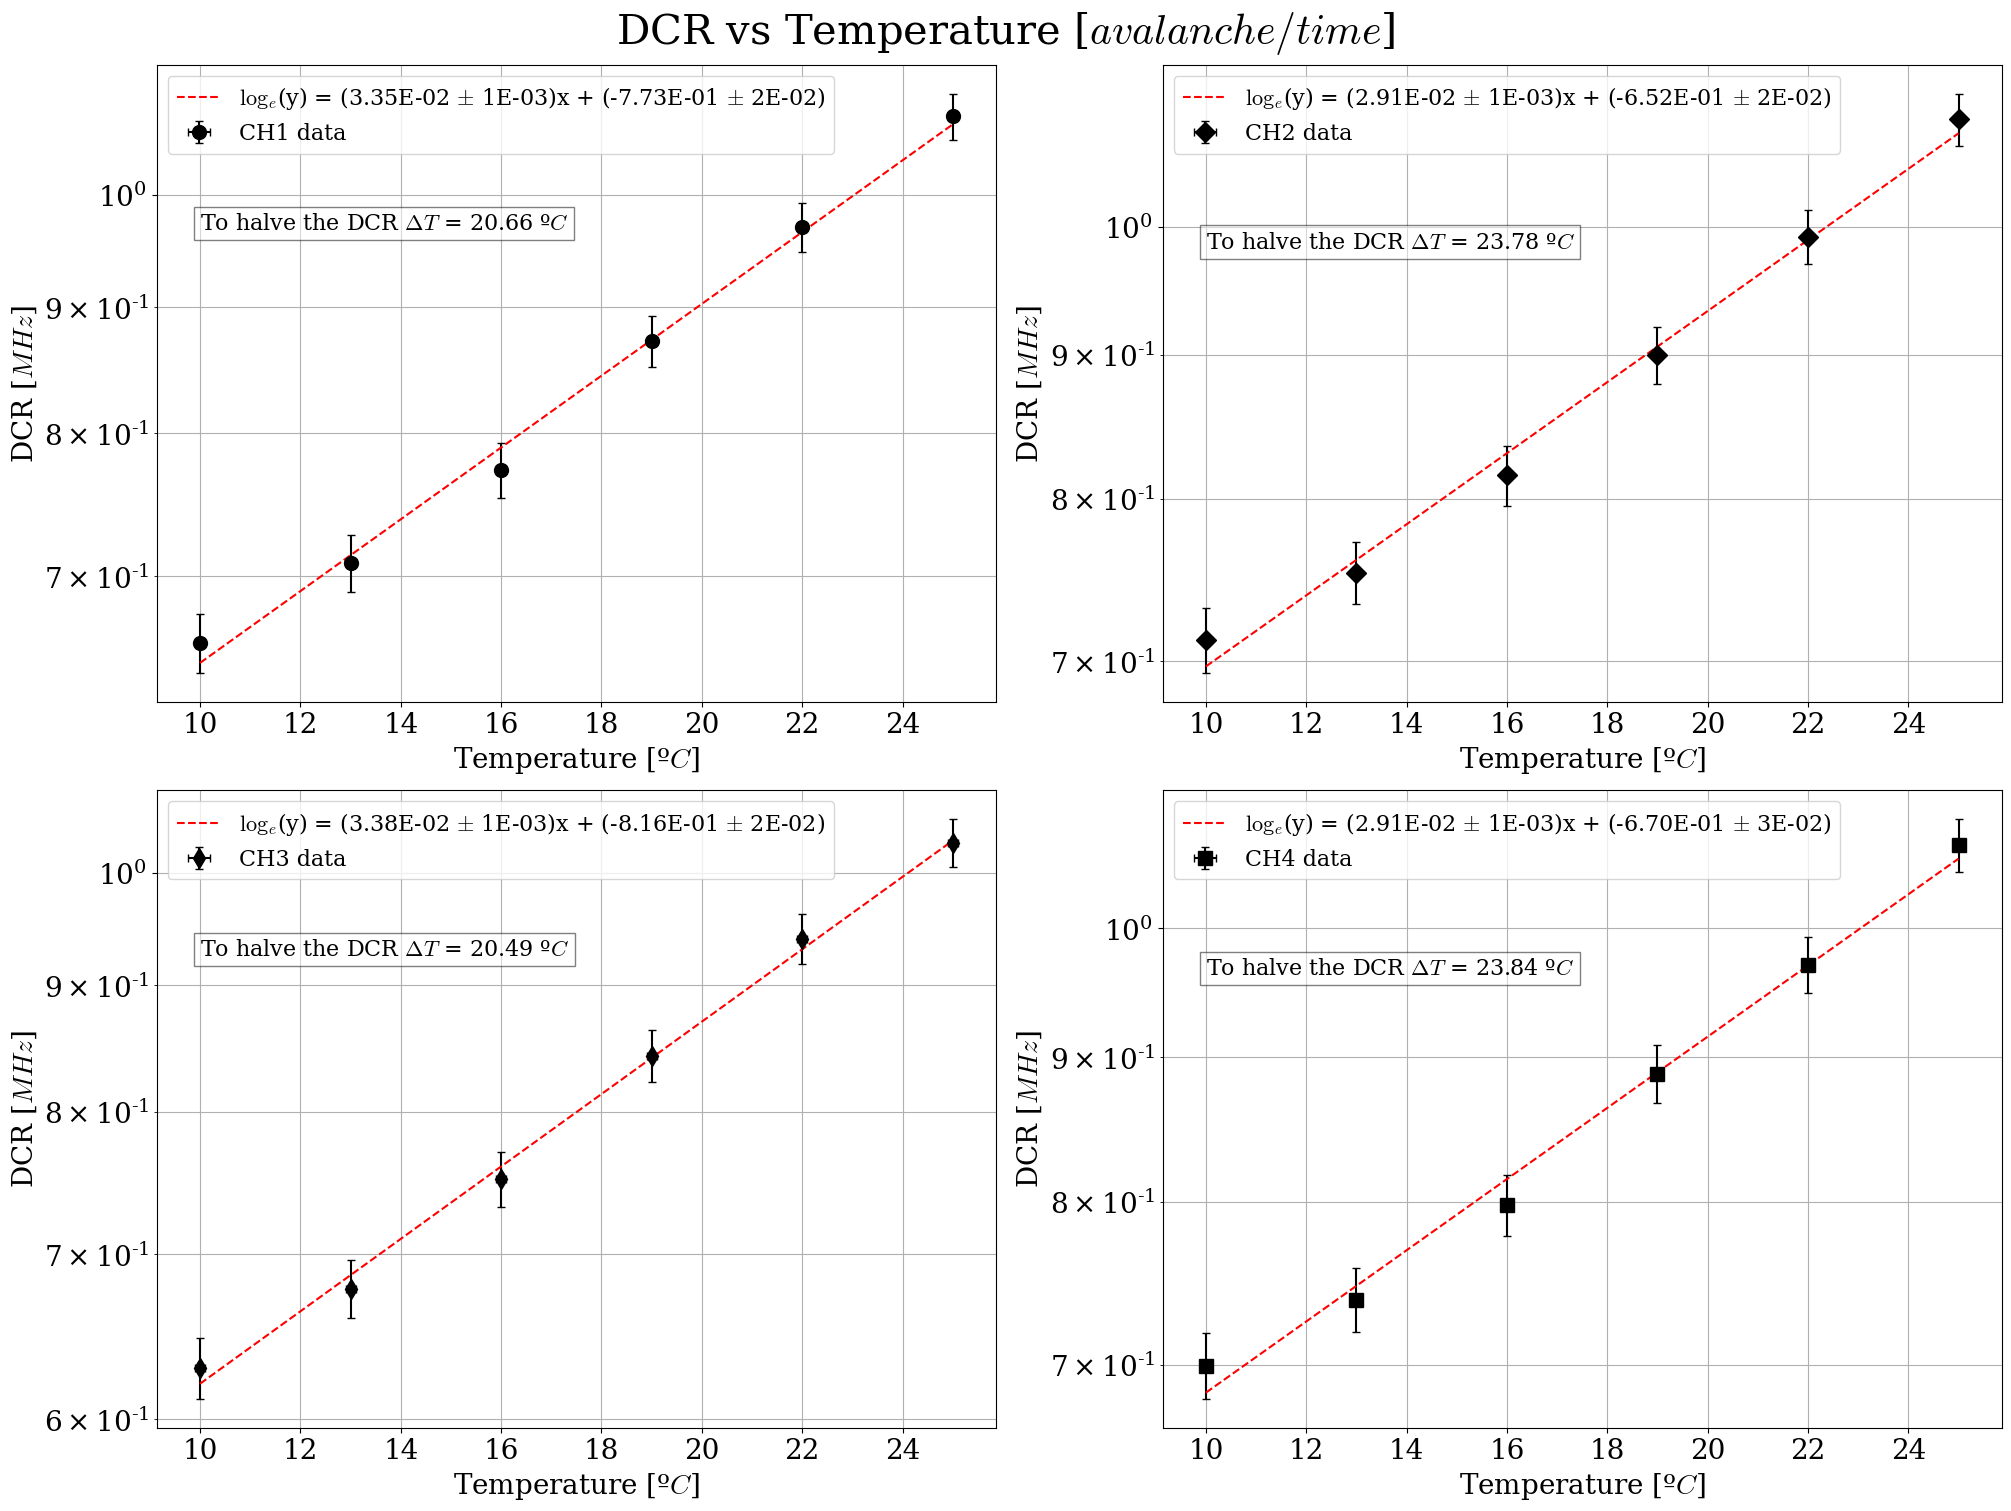

In [16]:
fig, axx = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15), constrained_layout=True)

font_size = 20
markers = ['o', 'D', 'd', 's', 'P', '^', 's']

for ii, DCR_CH in enumerate([DCR_CH1_avalanches, DCR_CH2_avalanches, DCR_CH3_avalanches, DCR_CH4_avalanches]):
# for ch in ['CH3']:
    ax = axx[int(ii/2), ii%2] 

    x = np.array(list(DCR_CH.keys()))
    y = np.array(list(DCR_CH.values()))*1e-6 # MHz
    order = np.argsort(x)
    x = x[order]
    y = y[order]

    # Perform linear fit and get covariance matrix
    y_fit = np.log(y)
    params, cov = np.polyfit(x, y_fit, 1, cov=True)
    slope, intercept = params

    # Get errors (standard deviations) from the covariance matrix
    slope_err = np.sqrt(cov[0, 0])
    intercept_err = np.sqrt(cov[1, 1])
    
 
    ax.errorbar(x, y
                ,xerr=0.1
                ,yerr=np.sqrt(y/n_waveforms)
                ,fmt=f'{markers[ii]}k' 
                ,label = fr'CH{ii+1} data' 
                ,alpha = 1
                ,capsize=3
                ,markersize = 10)
    
    ax.plot(x, np.exp(slope*x + intercept)
            ,'--r', alpha = 1
            ,label = fr'$\log_e$(y) = ({slope:.2E} $\pm$ {slope_err:.0E})x + ({intercept:.2E} $\pm$ {intercept_err:.0E})')
    
    ax.text(x.min(), y.max()*0.9, fr'To halve the DCR $\Delta T$ = {np.log(2)/slope:.2f} º$C$'
            ,bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
            ,fontsize = font_size*0.8); 
    
    ax.set_xlabel(r'Temperature [º$C$]', fontsize = font_size);
    ax.set_ylabel(r'DCR [$MHz$]', fontsize = font_size);
    ax.set_yscale('log')
    ax.grid(True)
    ax.grid(True, which="both")

    ax.legend(fontsize = font_size*0.8)

fig.suptitle(fr'DCR vs Temperature [$avalanche/time$]', fontsize = 1.5*font_size);


##  Data Analysis: DCR vs temp (directly with the Keithley)


In [17]:
DCR_CH1 = {}
DCR_CH2 = {}
DCR_CH3 = {}
DCR_CH4 = {}

In [18]:
DCR_CH1[25] = 1.65e-6 # A
DCR_CH2[25] = 2.43e-6 # A
DCR_CH3[25] = 2.16e-6 # A
DCR_CH4[25] = 1.82e-6 # A

In [19]:
DCR_CH1[22] = 1.35e-6 # A
DCR_CH2[22] = 2.01e-6 # A
DCR_CH3[22] = 1.77e-6 # A
DCR_CH4[22] = 1.50e-6 # A

In [20]:
DCR_CH1[19] = 1.16e-6 # A
DCR_CH2[19] = 1.74e-6 # A
DCR_CH3[19] = 1.51e-6 # A
DCR_CH4[19] = 1.29e-6 # A

In [21]:
DCR_CH1[16] = 0.97e-6 # A
DCR_CH2[16] = 1.47e-6 # A
DCR_CH3[16] = 1.25e-6 # A
DCR_CH4[16] = 1.10e-6 # A

In [22]:
DCR_CH1[13] = 0.82e-6 # A
DCR_CH2[13] = 1.26e-6 # A
DCR_CH3[13] = 1.05e-6 # A
DCR_CH4[13] = 0.95e-6 # A

In [23]:
DCR_CH1[10] = 0.73e-6 # A
DCR_CH2[10] = 1.12e-6 # A
DCR_CH3[10] = 0.93e-6 # A
DCR_CH4[10] = 0.84e-6 # A

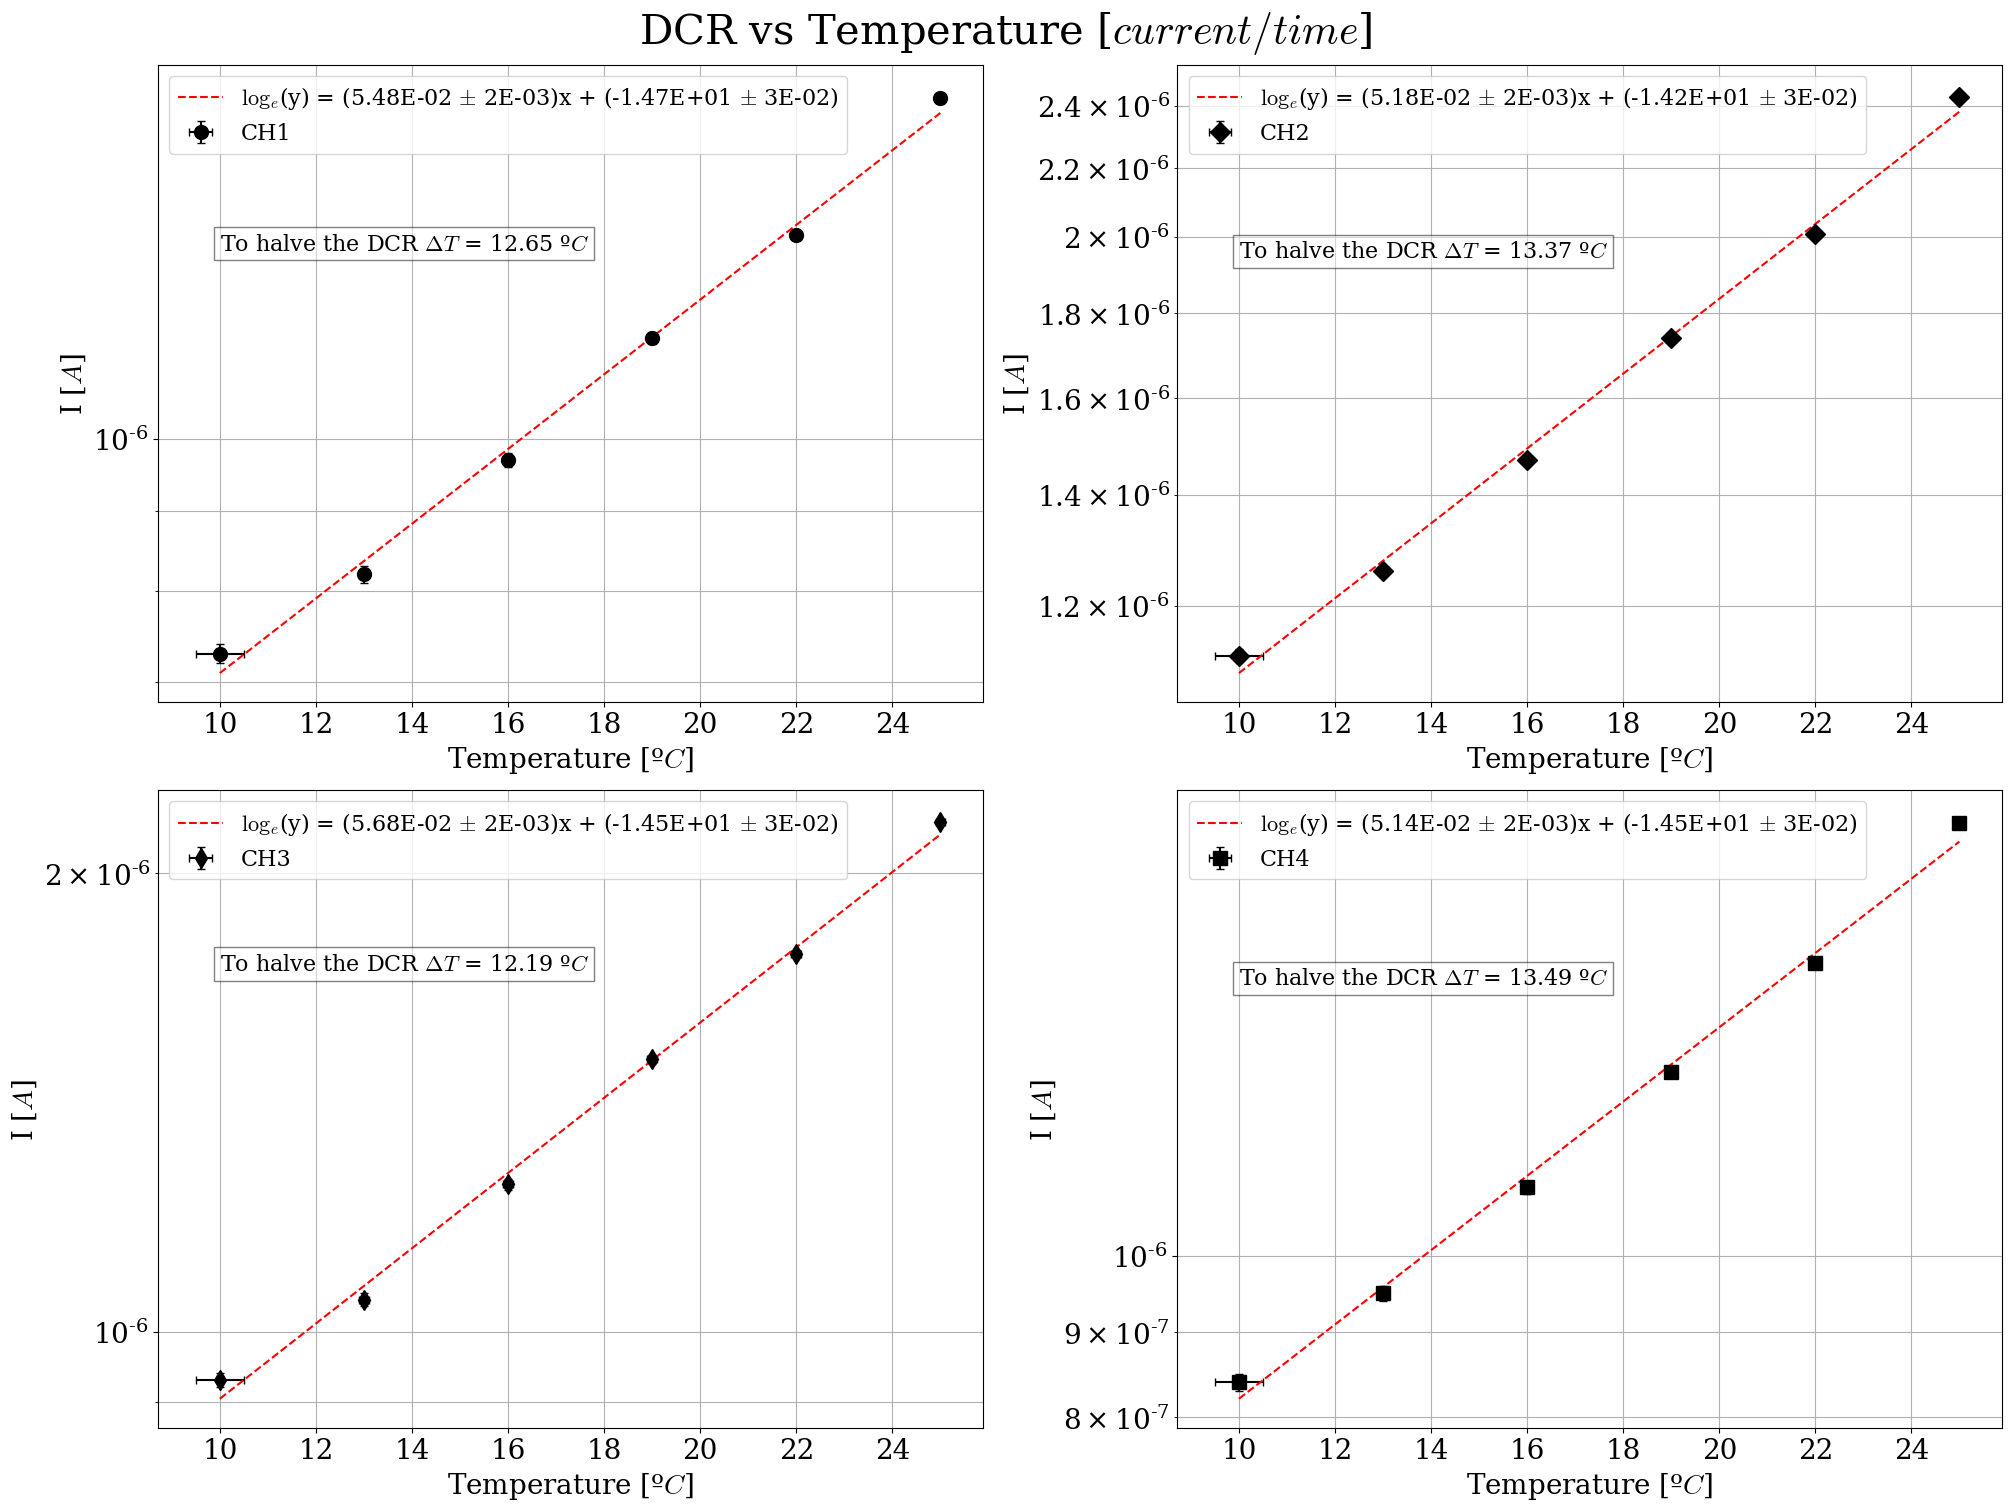

In [24]:
fig, axx = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15), constrained_layout=True)

font_size = 20
markers = ['o', 'D', 'd', 's', 'P', '^', 's', '*']

for ii, DCR_CH in enumerate([DCR_CH1, DCR_CH2, DCR_CH3, DCR_CH4]):
# for ch in ['CH3']:
    ax = axx[int(ii/2), ii%2] 

    x = np.array(list(DCR_CH.keys()))
    y = np.array(list(DCR_CH.values())) # A
    order = np.argsort(x)
    x = x[order]
    y = y[order]

    # Perform linear fit and get covariance matrix
    y_fit = np.log(y)
    params, cov = np.polyfit(x, y_fit, 1, cov=True)
    slope, intercept = params

    # Get errors (standard deviations) from the covariance matrix
    slope_err = np.sqrt(cov[0, 0])
    intercept_err = np.sqrt(cov[1, 1])
    
 
    ax.errorbar(x, y
                ,xerr=np.array([0.5, 0.1, 0.1, 0.1, 0.1, 0.1])
                ,yerr=0.01e-6
                ,fmt=f'{markers[ii]}k' 
                ,label = fr'CH{ii+1}' 
                ,capsize=3
                ,markersize = 10)
    
    ax.plot(x, np.exp(slope*x + intercept)
            ,'--r', alpha = 1
            ,label = fr'$\log_e$(y) = ({slope:.2E} $\pm$ {slope_err:.0E})x + ({intercept:.2E} $\pm$ {intercept_err:.0E})')
    
    ax.text(x.min(), y.max()*0.8, fr'To halve the DCR $\Delta T$ = {np.log(2)/slope:.2f} º$C$'
            ,bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
            ,fontsize = font_size*0.8); 
    
    ax.set_xlabel(r'Temperature [º$C$]', fontsize = font_size);
    ax.set_ylabel(r'I [$A$]', fontsize = font_size);
    ax.set_yscale('log')
    ax.grid(True)
    ax.grid(True, which="both")

    ax.legend(fontsize = font_size*0.8)

fig.suptitle(fr'DCR vs Temperature [$current/time$]', fontsize = 1.5*font_size);
